In [ ]:
import sys

In [ ]:
print(sys.executable)

# 一、Boston's Room Price Predict

1. Linear model (linear regression)
2. Correlation, salient(significant) feature
3. K-Neighbor-Nearest
4. Random Interation get best k and b [Monte Cario Method]
5. * Loss
6. Gradient Descent
7. Performance of Gradient Descent

In [54]:
from sklearn.datasets import load_boston
import pandas as pd 
import seaborn as sns
import numpy as np # numpy

%matplotlib inline

In [55]:
# load data sets
dt = load_boston()

D:\anaconda3\envs\Gaopy3.7\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [56]:
dt.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [57]:
dt_frame = pd.DataFrame(dt['data'])
dt_frame.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [58]:
# feature names
dt['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [59]:
dt['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

## 二、Features Description
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- ...




In [60]:
dt_frame.columns = dt['feature_names']
dt_frame.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [61]:
dt_frame['price'] = dt['target']
dt_frame.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


### delete column from pd frame
.drop(index="price",axis=1)

## 三、Heat-Map：两两特征之间的相关系数
观察 X上的price，可以看到RM对price的增长影响最大，LSTAT对price的降低影响最大

我们称 RM、LSTA是salient feature

<AxesSubplot:>

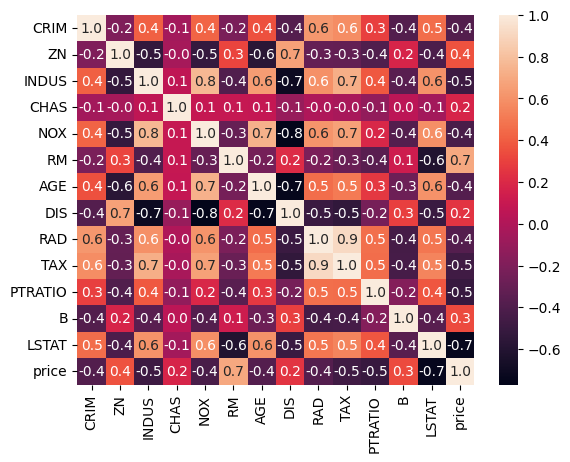

In [62]:
# heat map
# correlation
sns.heatmap(dt_frame.corr(), annot=True, fmt='.1f')

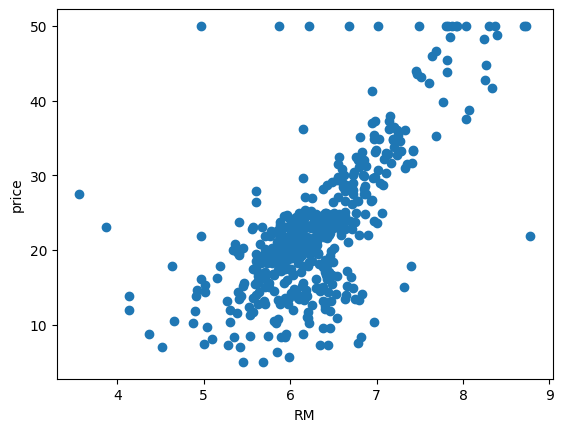

In [63]:
# relation between RM & price
import matplotlib.pyplot as plt
plt.xlabel('RM')
plt.ylabel('price')
plt.scatter(dt_frame['RM'], dt_frame['price'])

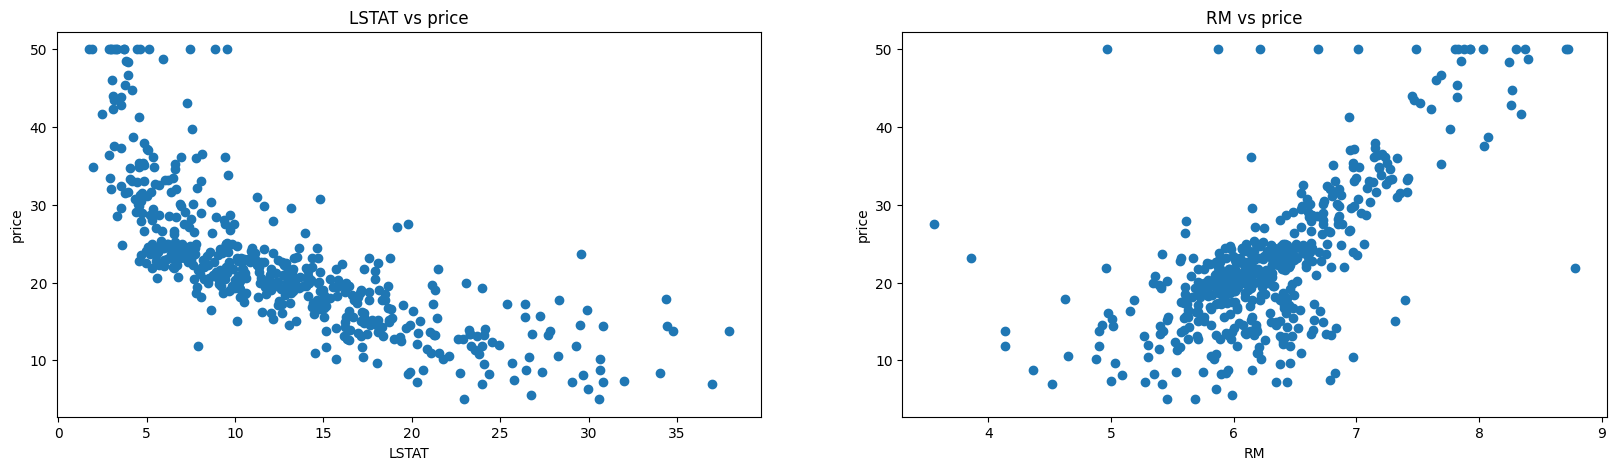

In [64]:
plt.figure(figsize=(20,5))

features = ['LSTAT', 'RM']
target = dt_frame['price']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = dt_frame[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("{} vs price".format(col))
    plt.xlabel(col)
    plt.ylabel('price')

# 四、Single Variable(Univariate) & Linear Regression

- 选取RM作为影响变量，进行单变量预测
- 从数据趋势看，大致满足线性模型
## Problem DSCP.
假设给定某个未来场景下的RM值(未曾出现过的数据)，要求模型给出预测值，该预测值尽可能合理

### 1. K-Neighbor-Nearest
利用历史数据计算，比如现在要预测RM[5.56]的数据，一种做法是从历史数据集中找到RM离5.56最近的K个点，并且取这K个点的结果平均作为预测结果。
缺点包括：每次计算需要遍历历史数据集，数据集变大即将成为瓶颈；预测准确率、可靠性不高，比如如果出现一个RM[100]，这个点在历史数据集中无相邻点，预测也会发生严重错误

In [65]:
x = dt_frame['RM']
y = dt_frame['price']


# {RM: price}
history_notes = {_x : _y for _x, _y in zip(x,y)}

# K-Neighbor-Nearest
def knn(query_x, history, top_n=3):
    sorted_notes = sorted(history.items(), key=lambda x_y: (x_y[0] - query_x) ** 2)
    similar_notes = sorted_notes[:top_n]
    similar_ys = [y for _,y in similar_notes]
    
    return np.mean(similar_ys)

In [66]:
%%time
knn(6.5, history_notes, 3)

Wall time: 0 ns


24.2

In [67]:
print("RM=6.575,price={}".format(history_notes[6.575]))

RM=6.575,price=24.0


In [68]:
sorted_notes = sorted(history_notes.items(), key=lambda x_y: (x_y[0] - 6.5) ** 2)
sorted_notes = sorted_notes[:3]
print(sorted_notes[:3])
similar_ys = [y for _, y in sorted_notes]
print(similar_ys)

[(6.495, 26.4), (6.51, 23.3), (6.49, 22.9)]
[26.4, 23.3, 22.9]


## 2. Fitting Function (拟合函数)
利用数据分析，建立RM & Price的线性关系模型，通过拟合函数获得预测能力，更快并且更加准确。这个例子中，使用拟合函数(0us)比使用KNN算法(1000us)预测快1000倍。

$$ f（rm） = k * rm + b $$

## Random Approach
Monte Cario Method 暴力法求解模型参数，通过随机模拟k、b参数，求解最佳拟合函数。

遇到第一个问题就是，什么时候停止？

- 关于什么时候停止，是程序拟合函数的关键问题，也就是“判定预测模型是否最优”，并且采取停止迭代，返回结果。这是一个衡量标准的问题。
- 正如上述，我们需要预先定义一个“判定预测模型是否最优”的函数，就我们讨论的问题而言
$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} (\hat{y_i} - y_i) ^ 2 $$
$$ Loss(k, b) = \frac{1}{n} \sum_{i \in N} ((k * rm_i + b) - y_i) ^ 2 $$
该Loss函数通过计算预测数据（集）与训练数据（集）之间的均方误差(Mean Square Error)，参数估计值与参数真值之差的平方的期望值（均值），这个偏差当然越小越好（理论上）。
- 此时，问题将被转化为随机取参数k、b，使得Loss函数越小越好，在某个时刻，Loss函数降到函数最低点，取得模型最优解，拟合出来的函数最好

In [69]:
# build linear model
# return predict result 
def model(rm, k, b):
    return (k * rm + b)

In [70]:
# define loss
def loss(y_hat, y):
    return np.mean((y_hat - y) ** 2)

In [71]:
import random

In [72]:
min_loss = float('inf')
best_k, best_b = None, None

for step in range(1000):
    min_v, max_v = -100, 100
    k, b = random.randrange(min_v, max_v), random.randrange(min_v, max_v)
    y_hats = [model(rm_i, k, b) for rm_i in x]
    
    current_loss = loss(y_hats, y)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print("在第{}步，拟合函数为f(rm)={} * rm + {}, 此时loss是: {}".format(step, k, b,current_loss))

在第0步，拟合函数为f(rm)=41 * rm + 75, 此时loss是: 96729.99086957905
在第1步，拟合函数为f(rm)=21 * rm + 78, 此时loss是: 35248.792900646244
在第3步，拟合函数为f(rm)=-5 * rm + -32, 此时loss是: 7530.012790859684
在第8步，拟合函数为f(rm)=-18 * rm + 87, 此时loss是: 2772.9254261422925
在第20步，拟合函数为f(rm)=9 * rm + 7, 此时loss是: 1726.9765834130435
在第24步，拟合函数为f(rm)=0 * rm + -11, 此时loss是: 1208.8686561264824
在第27步，拟合函数为f(rm)=14 * rm + -40, 此时loss是: 703.2281099051382
在第29步，拟合函数为f(rm)=6 * rm + -1, 此时loss是: 249.2724223162055
在第36步，拟合函数为f(rm)=-1 * rm + 20, 此时loss是: 171.62864317588932
在第45步，拟合函数为f(rm)=5 * rm + -19, 此时loss是: 154.0959884881423
在第54步，拟合函数为f(rm)=11 * rm + -52, 此时loss是: 74.55498159486164
在第161步，拟合函数为f(rm)=12 * rm + -56, 此时loss是: 57.45499045059289


In [73]:
%%time
# save k & b as the param. model
model(6.5,best_k,best_b)

Wall time: 0 ns


22.0

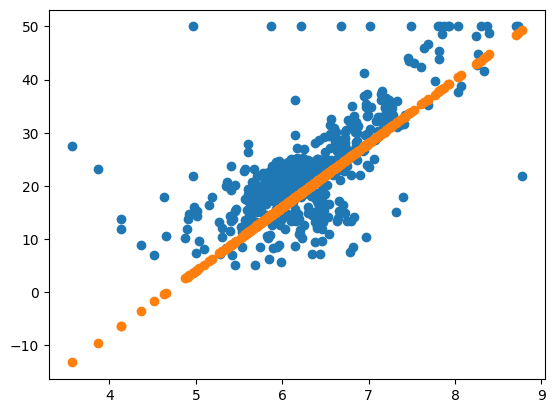

In [74]:
plt.scatter(x, y)
plt.scatter(x, [model(rm,best_k,best_b) for rm in x])

## 蒙特卡洛模拟存在的问题
- 随机k、b的过程中，并不是每一步都能够更新最佳的k、b值，但是，这些步骤里面进行了大量的计算，等于浪费计算时间（怎么样可以保证每一步都是有效更新？）
- 定义模型、loss函数、随机过程、进行迭代、得到最优k、b
- loss函数下降的趋势是，开始下降得快，越往后面越慢，最后维持在一个水平上，想得到一组k、b使得loss更小，显得更加难，即便将迭代次数增大也未必可以做到。（当然如果需要增加迭代次数，对于整个训练时间也是一个恐怖的缺陷）。
- 我们可以理解成，随机方法使得loss取得了一个局部最优解，甚至最大可能性是"连一个局部最优解都无法取到，就已经无法往下进行了"。
- 致命的，在复杂模型中，参数增加之后，再想用模拟拟合，事实上属于NP问题了

## (改进）Supervisor Learning

实际上，目前我们需要改进的方法是，如何保证loss函数可以逐步下降到函数最低点（loss最小）。利用偏导数的理论进行改进，这便是梯度下降算法了（Gradient Descent）.
$$ \frac{\partial{loss(k,b)}}{\partial{k}}>0,k\uparrow,loss\uparrow $$
$$ \frac{\partial{loss(k,b)}}{\partial{k}}<0,k\uparrow,loss\downarrow $$

- 最小二乘法 试图找到一条直线，使得所有样本到直线上的欧氏距离之和最小
$$ argmin_k,_b (Loss(k, b)) = argmin_k,_b (\frac{1}{n} \sum_{i \in N} ((k * rm_i + b) - y_i) ^ 2) $$
- 对于一元一次线性回归函数，联立两个方程：分别令loss对k偏导，loss对b偏导都等于零，可以得到closed-form解
$$ \frac{\partial{loss(k, b)}}{\partial{k}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i) * rm_i = 0 $$
$$ \frac{\partial{loss(k, b)}}{\partial{b}} = \frac{2}{n}\sum_{i \in N}(k * rm_i + b - y_i) = 0$$
- 但是对于复杂函数而言，方程往往无法得到closed-form解，Gradient Descent发挥重要作用：
一方面，对于多元复杂线性/非线性函数，参数量可能过亿，利用数值解显然是不可能的；另一方面，即使联立令偏导为0的方程组求出数值解，也需要考虑此点是否为极值点

In [75]:
# partial  k, b

def partial_k(k, b, x, y):
    return 2 * np.mean((k * x + b - y) * x)

def partial_b(k, b, x, y):
    return 2 * np.mean(k * x + b -y)

def update_k(k, b, x, y):
    return k + (-1 * learning_rate * partial_k(k, b, x, y))

def update_b(k, b, x, y):
    return b + (-1 * learning_rate * partial_b(k, b, x, y))

In [76]:
# parameters
k, b = random.random(), random.random()
min_loss = float('inf')
best_k, best_b = None, None

# hyper-parameters
learning_rate = 1e-2
train_steps = 4000

# all lost value
all_lost = []

In [77]:
print(1e-2)

0.01


##  Update parameters(k、b) with Gradient Descent 
$$ k_{n+1} = k_n - lr * \frac{\partial{loss}}{\partial{k}} $$
$$ b_{n+1} = b_n - lr * \frac{\partial{loss}}{\partial{k}} $$

In [78]:
# train
for step in range(train_steps):
    k, b = update_k(k, b, x, y), update_b(k, b, x, y)
    y_hats = k * x + b
    current_loss = loss(y_hats, y)
    all_lost.append(current_loss)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print("在第{}步,获得函数 f(rm) = {} * rm + {}, 此时loss是: {:.4f}".format(step, k, b, current_loss))

在第0步,获得函数 f(rm) = 2.9759832038719614 * rm + 0.8501977883438118, 此时loss是: 70.9694
在第1步,获得函数 f(rm) = 3.410868692328599 * rm + 0.909790631474448, 此时loss是: 59.5940
在第2步,获得函数 f(rm) = 3.490448256937533 * rm + 0.9135296918361744, 此时loss是: 59.2163
在第3步,获得函数 f(rm) = 3.505911188188373 * rm + 0.9071914016252304, 此时loss是: 59.1968
在第4步,获得函数 f(rm) = 3.5098037526307677 * rm + 0.8990362998291396, 此时loss是: 59.1889
在第5步,获得函数 f(rm) = 3.5116081332765896 * rm + 0.8905550331819775, 此时loss是: 59.1814
在第6步,获得函数 f(rm) = 3.5130354278558804 * rm + 0.8820165944146665, 此时loss是: 59.1739
在第7步,获得函数 f(rm) = 3.5143944108284106 * rm + 0.873469523930824, 此时loss是: 59.1664
在第8步,获得函数 f(rm) = 3.515740801838163 * rm + 0.8649225806342385, 此时loss是: 59.1589
在第9步,获得函数 f(rm) = 3.517084655780366 * rm + 0.8563773446988105, 此时loss是: 59.1514
在第10步,获得函数 f(rm) = 3.518427787164563 * rm + 0.8478341008681561, 此时loss是: 59.1439
在第11步,获得函数 f(rm) = 3.519770523489883 * rm + 0.8392929001204378, 此时loss是: 59.1365
在第12步,获得函数 f(rm) = 3.52111292391849

In [79]:
best_k, best_b

(6.96278677240659, -21.062139745700136)

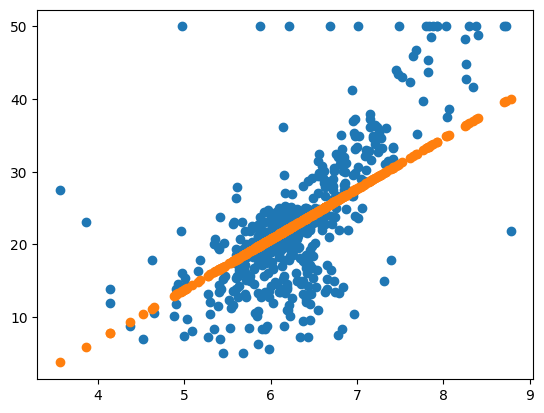

In [80]:
# model result
plt.scatter(x, y)
plt.scatter(x, [best_k * rm + best_b for rm in x])

## Catch Loss

In [81]:
# print(all_lost)

In [82]:
all_step = np.arange(train_steps)

In [83]:
# all_step

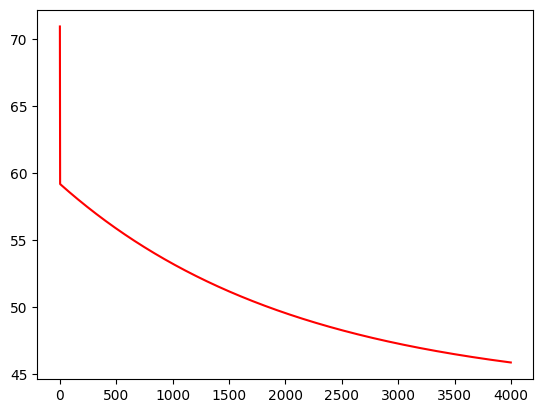

In [84]:
plt.plot(all_step, all_lost, ls='-', color='r', label='loss func.')

# Prob.
- 以上，线性模型并不能够解决现实中的非线性复杂问题
- 求解梯度是因为一元线性回归足够简单，可以推导出求解公式、closed-form solution，实质上在多元非线性的问题中这是不可行的
- Loss的定义决定了我们最终模型的精度

In [22]:
import numpy as np
import pandas as pd

In [23]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

D:\anaconda3\envs\Gaopy3.7\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [24]:
X = boston.data
y = boston.target

In [25]:
boston = pd.DataFrame(boston.data, columns = boston.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# 数据预处理
归一化或者标准化首先在维数非常多的时候，可以防止某一维或某几维对数据影响过大，其次可以程序可以运行更快。方法很多，标准化，min-max,z-score,p范数等，具体怎么使用，要根据数据集的特征来选择。

[延伸阅读-数据标准化的迷思之深度学习领域](https://zhuanlan.zhihu.com/p/81560511)

需要特别提到的一点是，诸如均值和标准差这一类的统计量，是由训练数据计算得来的，而不应该牵涉到验证集和测试集。正确的做法是，从训练数据中计算出统计量以后，标准化的方法应该保存下来，用来转化验证集和测试集。这一点普遍适用于所以机器学习的方法。

In [27]:
from sklearn.preprocessing import StandardScaler
Scale = StandardScaler() # z = x - u / s    
#  u 是均值，s是标准差
X = Scale.fit_transform(X)
X = pd.DataFrame(X, columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-5.616939e-17,6.319056e-17,-3.145486e-15,-2.106352e-17,2.752300e-15,-1.150770e-14,-1.137430e-15,7.582867e-16,5.616939e-17,5.616939e-17,-1.022283e-14,8.593916e-15,-5.897786e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


In [28]:
# y=Σwixi+b
# 因为b的求导都为1，给数据添加一个偏置b并且设置为1，当做数据的某一个特征并且进行梯度更新 wi*b=wi
X['bias']=1
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,bias
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,1
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,1
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,1
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,1
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,1
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,1


划分数据集，其中20%的数据用作测试集X_test,y_test,另外80%的数据用做训练集X_train,y_train，其中random_state为随机种子

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print("X_train.shape:{}, y_train.shape:{}".format(X_train.shape, y_train.shape))
print("X_test.shape:{}, y_test.shape:{}".format(X_test.shape, y_test.shape))

X_train.shape:(404, 14), y_train.shape:(404,)
X_test.shape:(102, 14), y_test.shape:(102,)


In [31]:
X_train = np.array(X_train)
X_train

array([[ 1.32780421, -0.48772236,  1.01599907, ..., -0.07887794,
         1.7181012 ,  1.        ],
       [-0.34750602, -0.48772236, -0.43725801, ...,  0.42701755,
        -0.5863558 ,  1.        ],
       [-0.41648392,  1.01446252, -0.74074945, ...,  0.06113692,
        -0.67606702,  1.        ],
       ...,
       [-0.41877066,  2.94584308, -1.3316823 , ...,  0.37570436,
        -0.93398678,  1.        ],
       [ 0.87825441, -0.48772236,  1.01599907, ..., -2.70626713,
         1.48821619,  1.        ],
       [-0.39389588, -0.48772236, -0.37597609, ..., -3.13442533,
        -0.28358043,  1.        ]])

## 模型训练与梯度更新
$$ L2-Loss(y, \hat{y}) = \frac{1}{n}\sum{(\hat{y} - y)}^2 $$
$$ L1-Loss(y, \hat{y}) = \frac{1}{n}\sum{|(\hat{y} - y)|} $$

In [32]:
import numpy as np

np.dot([1,2,3],[4,5,6])  # 1 * 4 + 2 * 5 + 3 * 6 = 32

32

In [33]:
def l1_cost(X, y, theta):
    """
    X 特征
    y 目标值
    theta 模型参数 【w1,w2,w3....,wn】 ，最后一个参数为了更新常数b（i~n）
    """
    k = X.shape[0]
    total_cost = 0
    for i in range(k):
        total_cost += 1/k * np.abs(y[i] - theta.dot(X[i, :]))
    
    return total_cost


def l2_cost(X, y, theta):
    k = X.shape[0]
    total_cost = 0
    for i in range(k):
        total_cost += 1/k * (y[i] - theta.dot(X[i, :]))**2
    
    return total_cost

In [34]:
np.zeros(10).shape
np.sign(6)  # 6 >= 0

1

[正则化](https://zhuanlan.zhihu.com/p/137073968)

[求MSE、MAE](https://blog.csdn.net/nefetaria/article/details/111238515)

[回归损失函数](https://blog.csdn.net/Roaddd/article/details/114798798)

[激活函数](https://zhuanlan.zhihu.com/p/364620596)

[自动求导](https://www.derivative-calculator.net/)

$$ \frac{\partial{|\hat{y} - x*k - b|}}{\partial{k}}$$
$$ = -x*\frac{(\hat{y} - x*k - b)}{|\hat{y} - x*k - b|}$$

In [35]:
def step_l1_gradient(X, y, learning_rate, theta):
    """
    计算MAE损失函数的梯度的函数
    对于0处的不可微分点返回梯度值0
    X:特征向量
    y：目标值
    learing_rate:学习率
    theta:参数
    """
    n = X.shape[0]
    e = y - X @ theta   
    gradients = -(X.T @ np.sign(e)) / n          
    theta = theta - learning_rate * gradients
    return theta

In [20]:
"""
X = np.array([[1.2, 2.3, 0.2, 1], [1.1, 2.3, 1.3, 1], [2.3, 3.4, 5.4, 1]])
y = np.array([10.2, 2, 9.3])
theta = np.array([2, 3, 4, 5])

print('X:{}\n'.format(X))
print('y:{}\n'.format(y))
print('theta:{}\n'.format(theta))

e = y - X @ theta
print('e:{}\n'.format(e))

print("X.T:{}\n".format(X.T))
print("sign(e): {}\n".format(np.sign(e)))

print("gradient:{}\n".format(X.T @ np.sign(e)))
"""

X:[[1.2 2.3 0.2 1. ]
 [1.1 2.3 1.3 1. ]
 [2.3 3.4 5.4 1. ]]

y:[10.2  2.   9.3]

theta:[2 3 4 5]

e:[ -4.9 -17.3 -32.1]

X.T:[[1.2 1.1 2.3]
 [2.3 2.3 3.4]
 [0.2 1.3 5.4]
 [1.  1.  1. ]]

sign(e): [-1. -1. -1.]

gradient:[-4.6 -8.  -6.9 -3. ]



In [37]:
def step_l2_gradient(X, y, learning_rate, theta):
    k = X.shape[0]
    n = X.shape[1]
    gradients = np.zeros(n)
    for i in range(k):
        for j in range(n):
            gradients[j] += (-2/k) * (y[i] - (theta.dot(X[i,:]))) * X[i,j]
    theta = theta - learning_rate * gradients
    return theta

In [42]:
def gradient_descent(X_train, y_train, learning_rate, iterations):
    k = X_train.shape[0]
    n = X_train.shape[1]
    # 初始化参数
    theta = np.zeros(n)
    loss_values = []
    
    for i in range(iterations):
        theta = step_l1_gradient(X_train, y_train, learning_rate, theta)
        loss = l1_cost(X_train, y_train, theta)
        loss_values.append(loss)
        print(i, ' cost:', loss)
    return theta, loss_values

In [43]:
# 超参数
learning_rate = 0.04
iterations = 30
theta, loss_values = gradient_descent(X_train, y_train, learning_rate, iterations)

0  cost: 22.756180733143896
1  cost: 22.71582681282243
2  cost: 22.675472892500967
3  cost: 22.63511897217951
4  cost: 22.594765051858065
5  cost: 22.55441113153661
6  cost: 22.51405721121515
7  cost: 22.47370329089367
8  cost: 22.43334937057222
9  cost: 22.39299545025078
10  cost: 22.35264152992932
11  cost: 22.31228760960784
12  cost: 22.27193368928638
13  cost: 22.23157976896493
14  cost: 22.191225848643473
15  cost: 22.150871928322054
16  cost: 22.11051800800057
17  cost: 22.070164087679103
18  cost: 22.02981016735765
19  cost: 21.98945624703621
20  cost: 21.949102326714755
21  cost: 21.908748406393304
22  cost: 21.868394486071857
23  cost: 21.828040565750353
24  cost: 21.787686645428902
25  cost: 21.747332725107476
26  cost: 21.706978804785994
27  cost: 21.666624884464554
28  cost: 21.62627096414309
29  cost: 21.585917043821627


In [46]:
import matplotlib.pyplot as plt

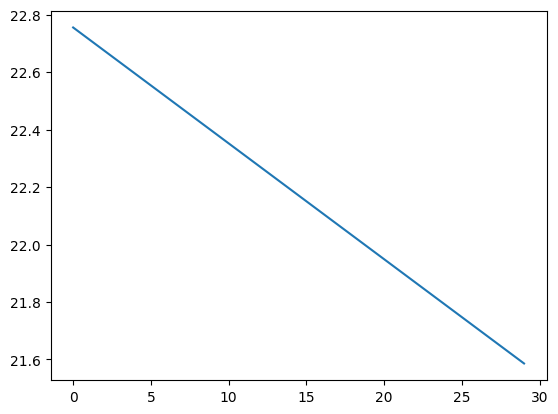

In [49]:
run_steps = np.arange(iterations)
plt.plot(run_steps, loss_values, label='loss func')